<a href="https://www.kaggle.com/code/anandtalware/language-detection-practice-8-september-2023?scriptVersionId=160713416" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Language Detection 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/language-detection/Language Detection.csv


# nltk imports

In [2]:
import nltk 
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer



# sklearn imports

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from wordcloud import WordCloud

# Naive Bayes- MultinomialNB
from sklearn.naive_bayes import MultinomialNB

# Data fetching in dataframe form

In [4]:
data = pd.read_csv('/kaggle/input/language-detection/Language Detection.csv')

In [5]:
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [6]:
data.tail()

,Text,Language
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada
10336,ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...,Kannada


In [7]:
print('Before any cleaning in dataset: ')
print('Total Records in dataset: ',data.shape[0])
print('Total Features in dataset: ', data.shape[1])

Before any cleaning in dataset: 
Total Records in dataset:  10337
Total Features in dataset:  2


# Check missing values in dataset

In [8]:
data.isnull().sum()

Text        0
Language    0
dtype: int64

- Here is not any null value in our dataset.

# Check Duplicated records in dataset

In [9]:
data.duplicated().sum()

66

- Here in dataset, we have 66  duplicate records, so we have to drop them.

In [10]:
# dropping duplicates
data.drop_duplicates(inplace=True)

# check again
data.duplicated().sum()

0

# Normal data information

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10271 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10271 non-null  object
 1   Language  10271 non-null  object
dtypes: object(2)
memory usage: 240.7+ KB


In [12]:
print('After any cleaning in dataset: ')
print('Total Records in dataset: ',data.shape[0])
print('Total Features in dataset: ', data.shape[1])

After any cleaning in dataset: 
Total Records in dataset:  10271
Total Features in dataset:  2


# EDA before preprocessing

### Value counts of target column

In [13]:
data['Language'].value_counts()

Language
English       1382
French        1007
Spanish        816
Portugeese     736
Italian        694
Russian        688
Sweedish       673
Malayalam      591
Dutch          542
Arabic         532
Turkish        471
German         465
Tamil          464
Danish         424
Kannada        366
Greek          358
Hindi           62
Name: count, dtype: int64

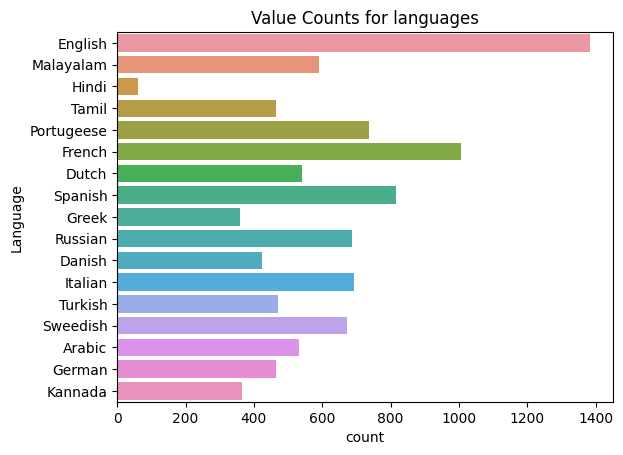

In [14]:
# countplot for Language columns
sns.countplot(y=data['Language'])
plt.title('Value Counts for languages')

plt.show()

# Data Preprocessing

In [15]:
# create fuction to preprocess test data

import string
punc = string.punctuation

# Define a translation table to remove punctuations
translator = str.maketrans('', '', punc)

def preprocess_text(text):
    # convert in lower case
    lower_text = text.lower()
    
    # word tokenization
    tokens = word_tokenize(text)
    
    
    # remove special charactors and punctuations
    tokens2 = [token.translate(translator) for token in tokens if token not in punc]
    
    # stemming
    stm = PorterStemmer()
    stemmed_tokens = [stm.stem(token) for token in tokens2]
    
    preprocessed_text = ' '.join(stemmed_tokens)
    return  preprocessed_text

print(preprocess_text(data['Text'][1]))

 natur  can refer to the phenomena of the physic world and also to life in gener


# Creat a new dataset which also has preprocessed text

In [16]:
data1 = data[['Text', 'Language']]
data1['Preprocessed_text'] = data1['Text'].apply(preprocess_text)

In [17]:
data1.head()

,Text,Language,Preprocessed_text
0,"Nature, in the broadest sense, is the natural...",English,natur in the broadest sens is the natur physic...
1,"""Nature"" can refer to the phenomena of the phy...",English,natur can refer to the phenomena of the phys...
2,"The study of nature is a large, if not the onl...",English,the studi of natur is a larg if not the onli p...
3,"Although humans are part of nature, human acti...",English,although human are part of natur human activ i...
4,[1] The word nature is borrowed from the Old F...,English,1 the word natur is borrow from the old french...


In [18]:
# check number of unique languages in dataset
data1['Language'].nunique()

17

In [19]:
from wordcloud import WordCloud 
wc = WordCloud(width=800, height=500, min_font_size=15, background_color='white')

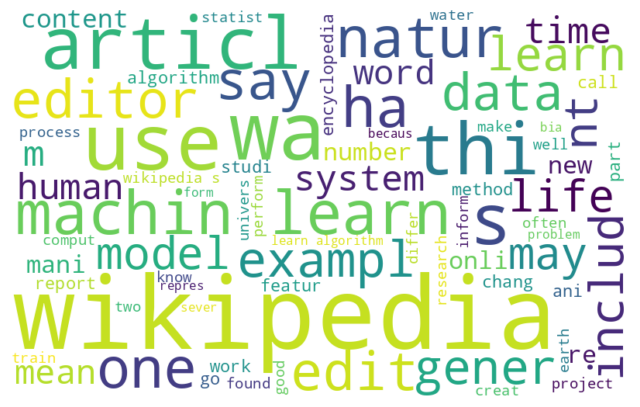

In [20]:
### 1. wordcloud for english language
english_df = data1[data1['Language']=='English']

english_words = english_df['Preprocessed_text'].str.cat(sep=' ')

english_wc = wc.generate(english_words)
plt.figure(figsize=(8,8))
plt.imshow(english_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
data1['Language'].unique()

array(['English', 'Malayalam', 'Hindi', 'Tamil', 'Portugeese', 'French',
       'Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian',
       'Turkish', 'Sweedish', 'Arabic', 'German', 'Kannada'], dtype=object)


---------- English Wordcloud ----------


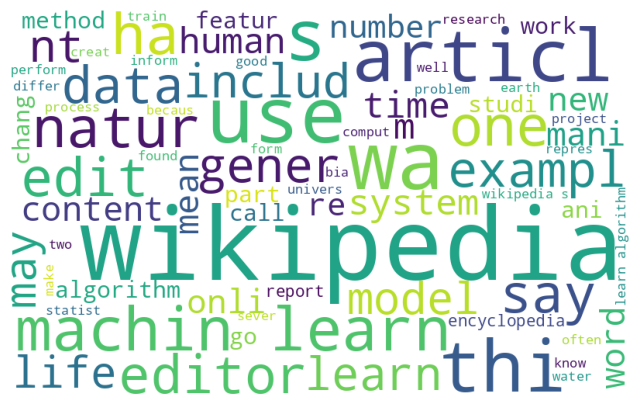


---------- Malayalam Wordcloud ----------


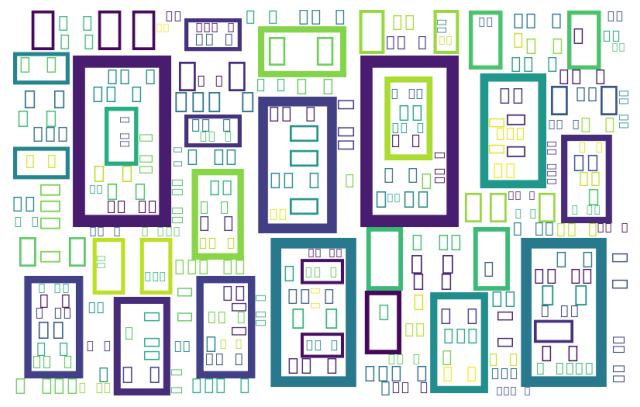


---------- Hindi Wordcloud ----------


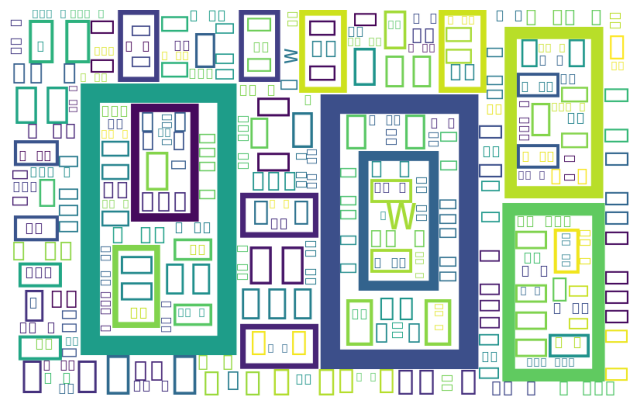


---------- Tamil Wordcloud ----------


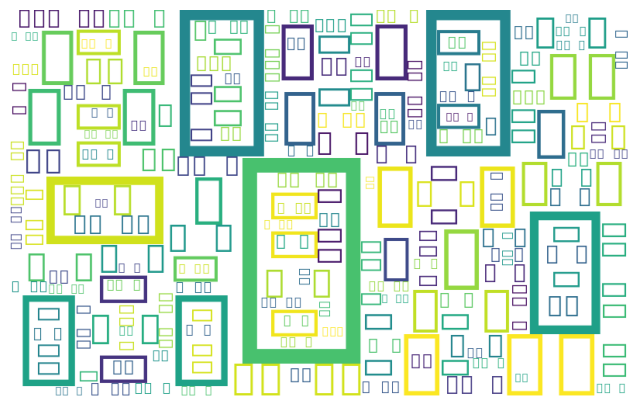


---------- Portugeese Wordcloud ----------


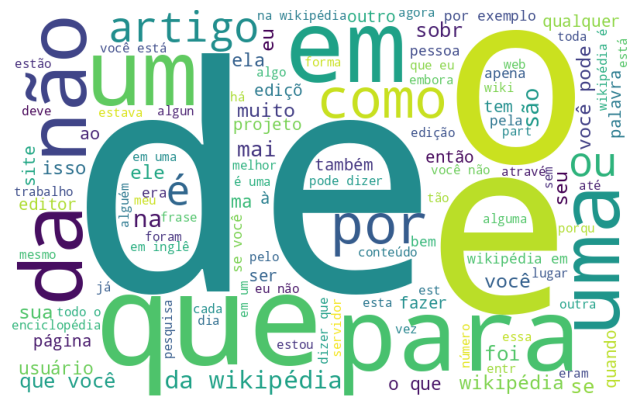


---------- French Wordcloud ----------


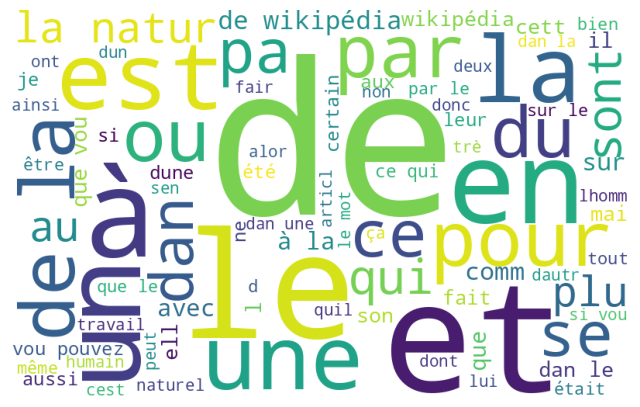


---------- Dutch Wordcloud ----------


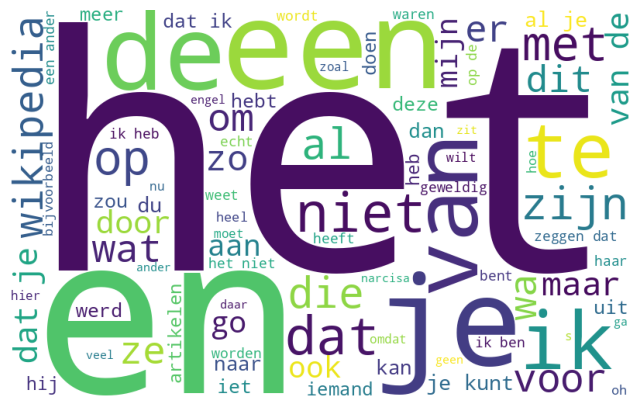


---------- Spanish Wordcloud ----------


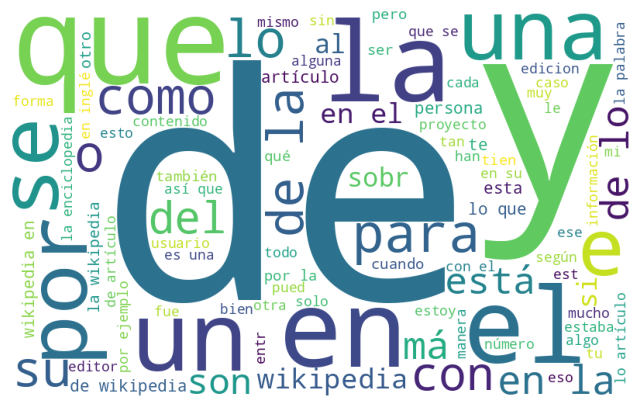


---------- Greek Wordcloud ----------


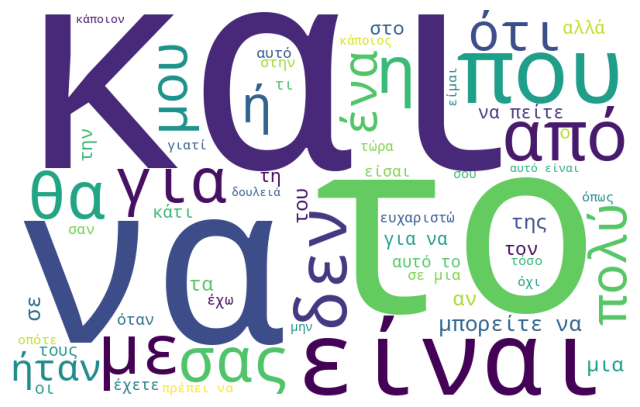


---------- Russian Wordcloud ----------


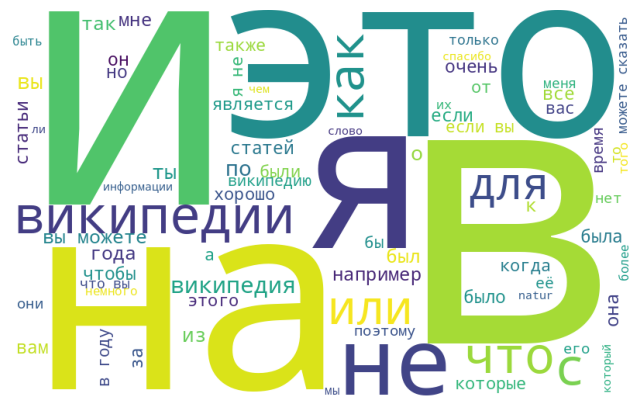


---------- Danish Wordcloud ----------


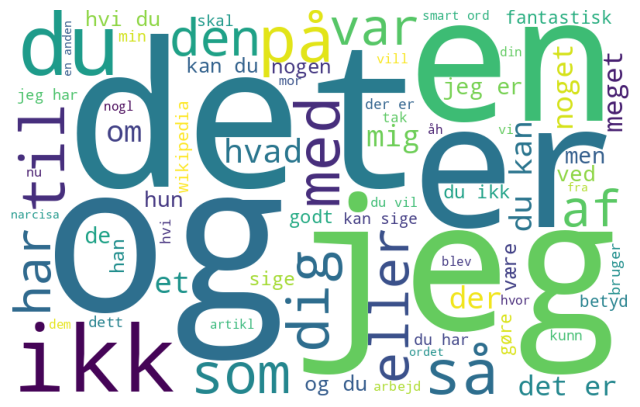


---------- Italian Wordcloud ----------


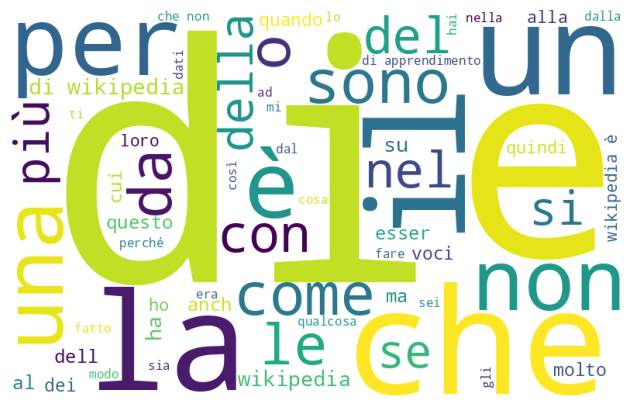


---------- Turkish Wordcloud ----------


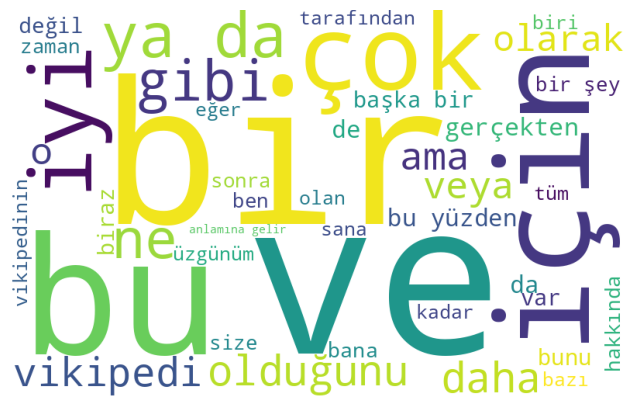


---------- Sweedish Wordcloud ----------


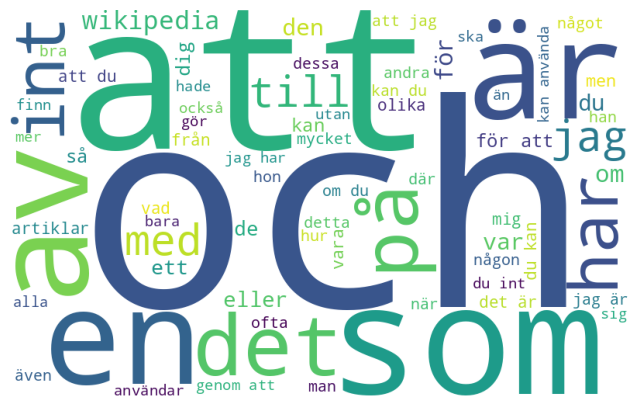


---------- Arabic Wordcloud ----------


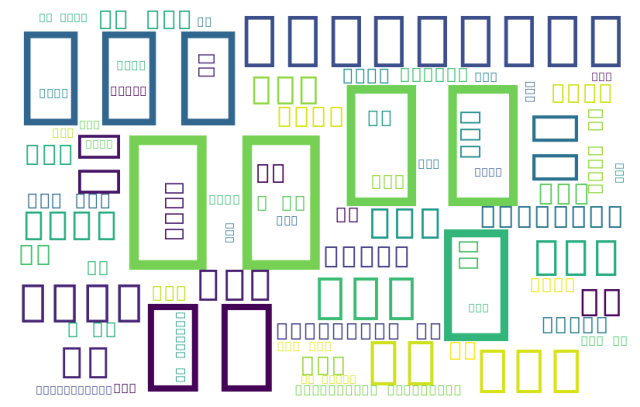


---------- German Wordcloud ----------


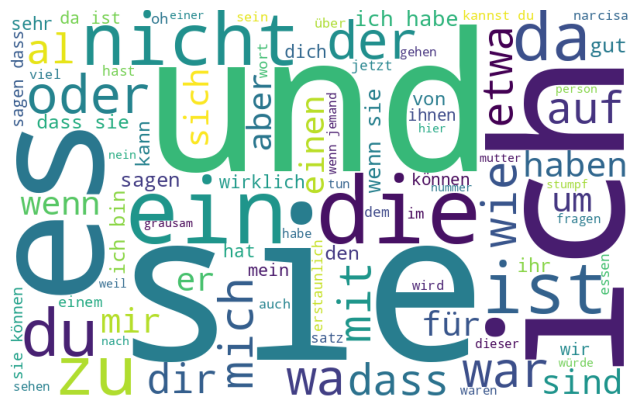


---------- Kannada Wordcloud ----------


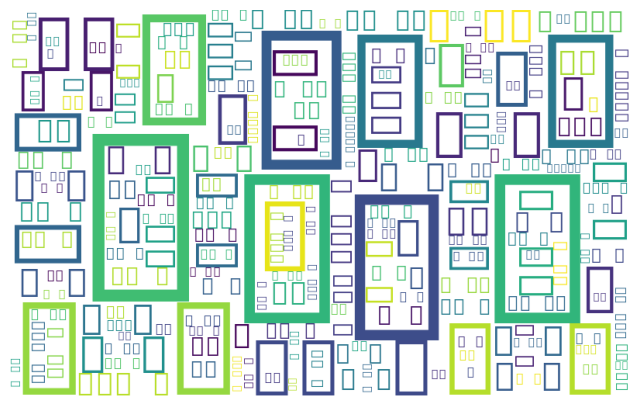

In [22]:
languages = data1['Language'].unique()
for lang in languages:
    print()
    print('-'*10, lang,'Wordcloud','-'*10)
    lang_df = data1[data1['Language']==lang]

    lang_words = lang_df['Preprocessed_text'].str.cat(sep=' ')

    lang_wc = wc.generate(lang_words)
    plt.figure(figsize=(8,8))
    plt.imshow(lang_wc)
    plt.axis('off')
    plt.show()
    print('=='*30)

In [23]:
data1[data1['Language']=='Hindi']

,Text,Language,Preprocessed_text
1979,विकि-शब्दकोष (एक मुक्त शब्दकोष एवं समानांतर को...,Hindi,विकिशब्दकोष एक मुक्त शब्दकोष एवं समानांतर कोष ...
1980,"[42] अंत में, विकिपीडिया एक पक्ष नहीं लेता है।...",Hindi,42 अंत में विकिपीडिया एक पक्ष नहीं लेता है। 43...
1981,बोट्स नामक कंप्यूटर प्रोग्राम के निर्माण के बा...,Hindi,बोट्स नामक कंप्यूटर प्रोग्राम के निर्माण के बा...
1982,"""""नहीं, हम नहीं जानते"", जिमी ने कहा.",Hindi,नहीं हम नहीं जानते जिमी ने कहा
1983,[60] कुछ आलोचकों का दावा है कि विकिपीडिया की ख...,Hindi,60 कुछ आलोचकों का दावा है कि विकिपीडिया की खुल...
...,...,...,...
2037,मैं सोच रहा था कि क्या यो मेरी मदद कर सकता है।...,Hindi,मैं सोच रहा था कि क्या यो मेरी मदद कर सकता है।...
2038,कैसे कुछ आइसक्रीम के बारे में?,Hindi,कैसे कुछ आइसक्रीम के बारे में
2039,क्या आप मुझे एक सवारी घर देना चाहेंगे?,Hindi,क्या आप मुझे एक सवारी घर देना चाहेंगे
2040,"जी बोलिये। यह बहुत अच्छा होगा, धन्यवाद। मैं ठी...",Hindi,जी बोलिये। यह बहुत अच्छा होगा धन्यवाद। मैं ठीक...


# checking words counts in each language

In [24]:
from collections import Counter

languages = data1['Language'].unique()
a = 1
for lang in languages:
    print()
    lang_corpus = []
    lang_text = data1[data1['Language']==lang]['Preprocessed_text'].tolist()
    for i in lang_text:
        for word in i.split():
            lang_corpus.append(word)
    print(f"{a}) Number of words in {lang} : ", len(lang_corpus))
    print(f'Top 15 words in {lang}:', Counter(lang_corpus).most_common(15))
    print('='*20)
    a+=1


1) Number of words in English :  30985
Top 15 words in English: [('the', 1563), ('of', 1026), ('and', 836), ('to', 741), ('a', 697), ('in', 579), ('that', 408), ('is', 404), ('wikipedia', 361), ('you', 356), ('for', 268), ('as', 262), ('it', 251), ('are', 211), ('on', 209)]

2) Number of words in Malayalam :  6117
Top 15 words in Malayalam: [('ഒരു', 139), ('നിങ്ങൾ', 121), ('ഞാൻ', 116), ('നിങ്ങൾക്ക്', 88), ('ഈ', 59), ('എനിക്ക്', 59), ('ഇത്', 54), ('അത്', 47), ('വളരെ', 39), ('എന്ന്', 37), ('എന്റെ', 37), ('വിക്കിപീഡിയ', 36), ('അല്ലെങ്കിൽ', 33), ('നിങ്ങളുടെ', 31), ('അതിനാൽ', 30)]

3) Number of words in Hindi :  14918
Top 15 words in Hindi: [('के', 563), ('में', 397), ('है', 345), ('और', 313), ('एक', 262), ('को', 251), ('कि', 244), ('से', 233), ('हैं', 229), ('आप', 198), ('की', 188), ('w', 188), ('है।', 187), ('·', 186), ('लिए', 173)]

4) Number of words in Tamil :  5574
Top 15 words in Tamil: [('நீங்கள்', 183), ('நான்', 150), ('ஒரு', 123), ('என்று', 95), ('அல்லது', 56), ('மிகவும்', 53), (

# # Split data as indepedent and dependent features

In [25]:
X = data1['Preprocessed_text']
y = data1['Language']

 # Train test split

In [26]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2)

In [27]:
print('shape of X:', X.shape)
print()
print('shape of X_train: ',X_train.shape)
print('shape of ty_train: ',y_train.shape)
print('shape of X_test: ',X_test.shape)
print('shape of y_test: ',y_test.shape)

shape of X: (10271,)

shape of X_train:  (8216,)
shape of ty_train:  (8216,)
shape of X_test:  (2055,)
shape of y_test:  (2055,)


In [28]:
print('number of unique langues in y_train: ',y_train.nunique())
print('number of unique langues in y_test: ',y_test.nunique())

number of unique langues in y_train:  17
number of unique langues in y_test:  17


# label encoder for talrget column

In [29]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Text Vectorization
## 1. CountVectorization

In [30]:
# countvectorizer
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train).toarray()
X_test_cv = cv.transform(X_test).toarray()

print('shape of X:', X.shape)
print()
print('shape of X_train_cv: ',X_train_cv.shape)
print('shape of X_test_cv: ',X_test_cv.shape)


shape of X: (10271,)

shape of X_train_cv:  (8216, 32376)
shape of X_test_cv:  (2055, 32376)


# 2. Tf-idf Vectorization

In [31]:
# tf-idf vectorizer
tv = TfidfVectorizer(max_features=2500)
X_train_tv = tv.fit_transform(X_train).toarray()
X_test_tv = tv.transform(X_test).toarray()

print('shape of X:', X.shape)
print()
print('shape of X_train_tv: ',X_train_tv.shape)
print('shape of X_test_tv: ',X_test_tv.shape)

shape of X: (10271,)

shape of X_train_tv:  (8216, 2500)
shape of X_test_tv:  (2055, 2500)


# Machine Learning algorithms

In [32]:
# first we check only for Naive Bayes MultinomialNB with countvectorized data
mnb = MultinomialNB()
mnb.fit(X_train_cv, y_train_encoded)
y_pred_mnb_cv = mnb.predict(X_test_cv)


print("accuracy score for mnb: ",accuracy_score(y_test_encoded, y_pred_mnb_cv))
print()
print("pricision score for mnb: ",precision_score(y_test_encoded,y_pred_mnb_cv, average='micro'))

accuracy score for mnb:  0.9800486618004867

pricision score for mnb:  0.9800486618004867


In [33]:
# multinomialNB with tfidf
mnb2 = MultinomialNB()
mnb2.fit(X_train_tv, y_train_encoded)
y_pred_mnb_tv = mnb2.predict(X_test_tv)


print("Test accuracy: ")
print("accuracy score for mnb: ",accuracy_score(y_test_encoded, y_pred_mnb_tv))
print()
print("pricision score for mnb: ",precision_score(y_test_encoded,y_pred_mnb_tv, average='micro'))


Test accuracy: 
accuracy score for mnb:  0.9430656934306569

pricision score for mnb:  0.9430656934306569


### Here we have got better accuracy and precision score with CountVectorized data on Naive Bayes MultinomialNB Machine Learning Model, we store it in .pkl file by using joblib or pickle module for further website or app developement process.

In [34]:
import joblib

joblib.dump(mnb, 'multinomialnb.pkl')

['multinomialnb.pkl']